In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import seed

# Effect of perceived partner interest on match success

This notebook will explore the differences values in a partner between men and women in aa speed dating scenario through logistic regression.

## Data loading and preprocessing

In [ ]:
url = 'https://raw.githubusercontent.com/samoseley/ecs171projectspeeddating/main/Speed%20Dating%20Data.csv'
df = pd.read_csv(url, encoding='latin1')

In [ ]:
df = df[['gender', 'match', 'age', 'race', 'exphappy',
       'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es']]

print(df.isnull().sum())

#remove NaN observations
df = df.dropna()

gender         0
match          0
age           95
race          63
exphappy     101
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
like         240
prob         309
met          375
match_es    1173
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['race'])

In [ ]:
scaler = MinMaxScaler()
df_colnames = ['match', 'age', 'exphappy',
        'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'gender', 'race_1.0', 'race_2.0','race_3.0','race_4.0','race_6.0']
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df_colnames)
display(df_norm)

,match,age,exphappy,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,gender,race_1.0,race_2.0,race_3.0,race_4.0,race_6.0
0,0.0,0.0,0.081081,0.222222,1.0,0.6,0.9,0.7,0.7,0.6,0.5,0.7,0.6,0.285714,0.222222,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.081081,0.222222,1.0,0.7,0.8,0.7,0.8,0.5,0.6,0.7,0.5,0.142857,0.222222,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.081081,0.222222,1.0,0.7,0.6,0.8,0.7,0.6,0.8,0.7,0.6,0.285714,0.222222,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.081081,0.222222,1.0,0.5,0.6,0.7,0.7,0.6,0.6,0.6,0.6,0.285714,0.222222,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.081081,0.222222,0.0,0.4,0.9,0.7,0.4,0.6,0.4,0.6,0.5,0.285714,0.222222,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,1.0,0.0,0.189189,1.000000,0.0,0.2,0.7,0.6,0.6,0.6,0.7,0.5,0.5,0.000000,0.166667,0.0,1.0,0.0,0.0,0.0
5812,1.0,0.0,0.189189,1.000000,0.0,0.3,0.4,0.6,0.4,0.4,0.4,0.4,0.5,0.000000,0.166667,0.0,1.0,0.0,0.0,0.0
5813,1.0,0.0,0.189189,1.000000,0.0,0.3,0.3,0.9,0.6,0.9,0.6,0.6,0.3,0.000000,0.166667,0.0,1.0,0.0,0.0,0.0
5814,1.0,0.0,0.189189,1.000000,0.0,0.2,0.7,0.9,0.8,0.7,0.8,0.6,0.6,0.000000,0.166667,0.0,1.0,0.0,0.0,0.0


In [ ]:
male = df[df.gender == 1]
male = male.drop(['gender', 'match'], axis=1)

In [ ]:
female = df[df.gender == 0]
female = female.drop(['gender', 'match'], axis=1)

## Logistic Regression: Male

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(male.drop(columns=['dec']), male['dec'], test_size=.20, random_state=30536)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

#get Testing and Training error

print("Linear Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse_male = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse_male)

Linear Regression MSE Trial 1:
Training MSE: 0.209122203098107
Testing MSE: 0.215146299483649


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       297
           1       0.81      0.66      0.72       286

    accuracy                           0.75       583
   macro avg       0.76      0.75      0.75       583
weighted avg       0.76      0.75      0.75       583



['age', 'exphappy', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0']
[[-0.0079297  -0.11503659  0.56016466 -0.28039359 -0.05148293  0.10558533
  -0.11814245  0.03264971  0.64705705  0.16343846  0.03964391  0.17559473
  -1.19460333 -1.07066173 -1.0462888  -0.46755023 -0.70724298]]


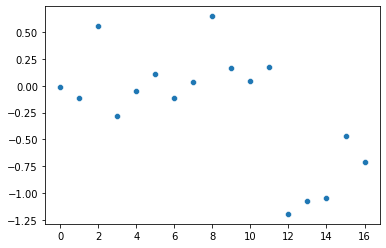

In [ ]:
print(['age', 'exphappy',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'race_1.0', 'race_2.0','race_3.0','race_4.0','race_6.0'])
print(model.coef_)
sns.scatterplot(x=list(range(0,len(model.coef_[0]))),y=model.coef_[0])

## Logistic Regression: Female

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(female.drop(columns=['dec']), female['dec'], test_size=.20, random_state=30536)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

#get Testing and Training error

print("Linear Regression MSE Trial 1:")
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#mse for training data
mse = mean_squared_error(y_train, yhat_train)
print('Training MSE: %8.15f' % mse)

#mse for testing data
mse_male = mean_squared_error(y_test, yhat_test)
print('Testing MSE: %8.15f' % mse_male)

Linear Regression MSE Trial 1:
Training MSE: 0.209122203098107
Testing MSE: 0.215146299483649


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       370
           1       0.71      0.69      0.70       211

    accuracy                           0.78       581
   macro avg       0.77      0.76      0.77       581
weighted avg       0.78      0.78      0.78       581



['age', 'exphappy', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_6.0']
[[-0.04067106  0.0615029   0.34242144 -0.13644346  0.06235138  0.20004914
  -0.22129429  0.08108461  0.55506627  0.10603203 -0.0885782   0.15001322
  -0.39476533 -1.47725393 -0.4558324  -0.82825853 -1.34335877]]


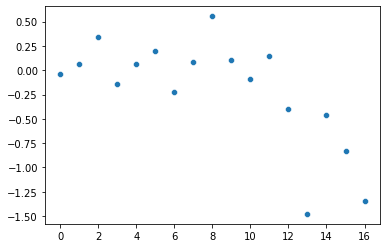

In [ ]:
print(['age', 'exphappy',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'race_1.0', 'race_2.0','race_3.0','race_4.0','race_6.0'])
print(model.coef_)
sns.scatterplot(x=list(range(0,len(model.coef_[0]))),y=model.coef_[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
